In [1]:
from ImageData import ScanAssets

In [2]:
a = ScanAssets('../images')
a.do(None)
len(a.data)

Skipping non image file: ../images/IDIAP/test.txt for class IDIAP


1080

In [3]:
image = a.data[215]

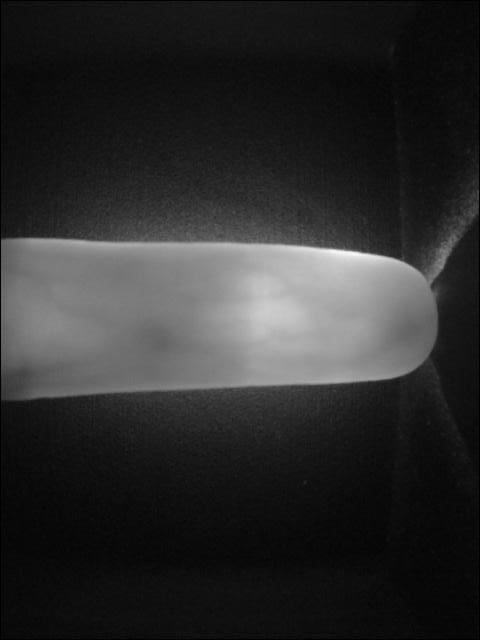

In [4]:
image.data[0]

In [60]:
import dtcwt
transform = dtcwt.Transform2d()
imageArr = image.getRawArray()
waveletLevel = 3
t = transform.forward(imageArr, nlevels=waveletLevel)

In [61]:
from PIL import Image
low = Image.fromarray(t.lowpass, mode="L")
low

In [62]:
import numpy as np
np.abs(t.highpasses[0][:,:,1])

array([[1.16691704e-16, 9.36627948e-17, 6.49493893e-17, ...,
        7.81208714e-17, 2.20122720e-16, 5.27408976e-16]])

In [63]:
np.sum(np.abs(t.highpasses[0][:,:,1]))

1.5289429721810573e-10

In [64]:
numbers = np.abs(t.highpasses[0][:,:,1])
test = np.interp(numbers, [np.amin(numbers), np.amax(numbers)], [255, 0]).astype(int)
test

array([[253, 253, 254, ..., 253, 252, 248]])

In [65]:
import math
math.floor(math.sqrt(test.size) + 1)

392

In [66]:
304 * 304

92416

In [67]:
np.average(test)

241.52462239583335

In [68]:
t.highpasses[1].shape

(1, 76800, 6)

In [69]:
t.highpasses[0][:,:,1]

array([[ 1.14541399e-16-2.22984671e-17j, -6.63346540e-17+6.61243738e-17j,
        -5.89792265e-17-2.72006252e-17j, ...,
         4.94289989e-17-6.04949965e-17j,  1.74716594e-16+1.33895943e-16j,
        -5.18454693e-16-9.67727188e-17j]])

In [70]:
307200 / 2.0

153600.0

In [71]:
for x in reversed(range(waveletLevel)):
    print(x)

2
1
0


In [92]:
from PIL import Image
import math
output = []
for level in reversed(range(waveletLevel)):
    for slice_idx in reversed(range(t.highpasses[level].shape[2])):
        highpass = np.abs(t.highpasses[level][:,:,slice_idx])
        highpass_interpolated = np.interp(highpass, [np.amin(highpass), np.amax(highpass)], [0, 255])
        half_size = math.floor(math.sqrt(highpass_interpolated.size) + 1)
        slice_img = Image.frombuffer("L", (half_size, half_size), highpass_interpolated)
        output.append(slice_img)

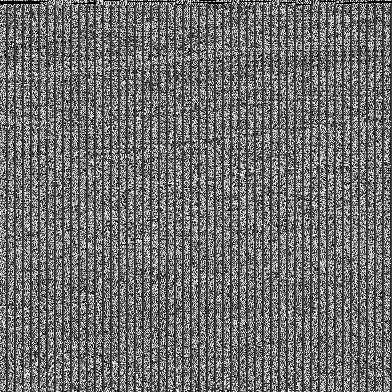

In [93]:
output[17]

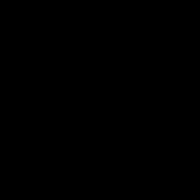

In [18]:
output[1]